In [1]:
!wget https://www.dropbox.com/s/nd7v1fod89xla6j/vk_texts_with_sources.csv

--2019-03-04 23:07:13--  https://www.dropbox.com/s/nd7v1fod89xla6j/vk_texts_with_sources.csv
Распознаётся www.dropbox.com (www.dropbox.com)… 162.125.70.1
Подключение к www.dropbox.com (www.dropbox.com)|162.125.70.1|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 301 Moved Permanently
Адрес: /s/raw/nd7v1fod89xla6j/vk_texts_with_sources.csv [переход]
--2019-03-04 23:07:14--  https://www.dropbox.com/s/raw/nd7v1fod89xla6j/vk_texts_with_sources.csv
Повторное использование соединения с www.dropbox.com:443.
HTTP-запрос отправлен. Ожидание ответа… 302 Found
Адрес: https://ucd4f9bfb1c342c3e972240f70d1.dl.dropboxusercontent.com/cd/0/inline/AcfCUtOhNQXUEz6qhi7m2JXDiK5prOau2aPZv6h2MVrNXVYl9rEgwX5V-XNiK7-hIcEHeNlg8avUvAGH9Pf7Fs_-ghu88p3U48AOSzlM6djauGY0qKKzE06ZwM06wlZOyzk/file# [переход]
--2019-03-04 23:07:14--  https://ucd4f9bfb1c342c3e972240f70d1.dl.dropboxusercontent.com/cd/0/inline/AcfCUtOhNQXUEz6qhi7m2JXDiK5prOau2aPZv6h2MVrNXVYl9rEgwX5V-XNiK7-hIcEHeNlg8avUvAGH9Pf7Fs_-gh

In [172]:
import pandas as pd
df = pd.read_csv('vk_texts_with_sources.csv', usecols = ['text', 'source'])
df.head()

,text,source
0,Начальник Главного оперативного управления Ген...,mil
1,Артиллерийские подразделения общевойскового об...,mil
2,Подразделения морской пехоты Каспийской флотил...,mil
3,Команды на всеармейских этапах конкурсов АрМИ-...,mil
4,На большом учебно-методическом командирском сб...,mil


## Задание 1
Посчитайте:
* количество текстов и количество классов
* количество слов (без лемматизации и с лемматизацией) в коллекции
* среднюю длину текста в словах и символах
* найдите 5 самых частых существительных в текстах каждого паблика 

*Рекомендуем использовать pandas для расчета описательных статистик.*

In [13]:
df.count()

text      11625
source    11625
dtype: int64

In [2]:
n_texts = len(df) #кол-во текстов
n_categories = len(df.source.value_counts()) #кол-во классов
print(n_texts, n_categories)

11625 4


In [6]:
df.source.value_counts()

mchsgov        3030
mil            3030
mospolice      2910
russianpost    2655
Name: source, dtype: int64

In [3]:
#избавляемся от <br> в тексте
import re

for i in df.index:
    df.loc[i, "text"] = re.sub('<.*?>', ' ', str(df.text[i]))        

In [32]:
from string import punctuation
punct = punctuation+'«»—…“”*№–'

words = []
for text in df.text:
    text = text.split()
    for word in text:
        words.append(word.strip(punct))
words = [w.lower() for w in words if w]

wordcount = len(set(words)) #число уникальных слов без лемматизации
wordcount

84725

In [34]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [ ]:
words_lemmatized = [morph.parse(w)[0].normal_form for w in words]

In [12]:
lemma_wordcount = len(set(words_lemmatized)) #число уникальных слов с лемматизацией
lemma_wordcount 

39129

In [6]:
import numpy as np

word_lists = [[w.strip(punct) for w in text.split() if w.strip(punct)] for text in df.text]
mean_words = np.mean([len(text) for text in word_lists]) #среднее число слов в тексте
mean_words

83.911913978494624

In [7]:
len(word_lists) == len(df.index)

True

In [13]:
symbol_lists = [[s for s in text] for text in df.text]
mean_symbols = np.mean([len(text) for text in symbol_lists]) #среднее число символов в тексте
mean_symbols

667.45255913978497

In [14]:
df.source.value_counts()

mchsgov        3030
mil            3030
mospolice      2910
russianpost    2655
Name: source, dtype: int64

Для нахождения 5 самых частотных сущствительных в каждом классе создадим словарь вида "класс-тексты этого класса" и напишем программу, которая посчитает 5 самых частотных существительных в каждом классе и запишет в словарь. 

In [47]:
classes = ['mchsgov', 'mil', 'mospolice', 'russianpost']
dictionary = {}
for i in classes:
    text = ' '.join(df.loc[df["source"]==i].text)
    dictionary[i] = text

In [48]:
from collections import Counter


def get_five_nouns(dictionary):
    most_common = {}
    for class_, text in dictionary.items():
        words = []
        text = text.split()
        for word in text:
            words.append(word.strip(punct))
        words = [w.lower() for w in words if w]
        nouns = [morph.parse(w)[0].normal_form for w in text if w and morph.parse(w)[0].tag.POS == 'NOUN'] 
        five_nouns = [n[0] for n in Counter(nouns).most_common(5)]
        most_common[class_] = five_nouns
    return most_common

In [49]:
nouns = get_five_nouns(dictionary) 

In [50]:
nouns #5 самых частых существительных в текстах каждого паблика

{'mchsgov': ['#мчс', '#мчсроссия', 'мчс', 'россия', 'спасатель'],
 'mil': ['#минобороны', 'военный', 'россия', 'год', 'оборона'],
 'mospolice': ['россия', 'мвд', 'москва', 'полиция', 'сотрудник'],
 'russianpost': ['почта', 'россия', 'год', 'отделение', '#почтароссия']}

In [35]:
#для последующих заданий лемматизируем word_lists и добавим их в датафрейм
word_lists = [[w.strip(punct) for w in text.split() if w.strip(punct)] for text in df.text]
lemmas_list = []
for list_ in word_lists:
    lemmas = [morph.parse(w)[0].normal_form for w in list_]
    lemmas_list.append(lemmas)

In [36]:
df.insert(loc = 2, column = 'lemmas', value = lemmas_list)
df.head()

,text,source,lemmas
0,Начальник Главного оперативного управления Ген...,mil,"[начальник, главный, оперативный, управление, ..."
1,Артиллерийские подразделения общевойскового об...,mil,"[артиллерийский, подразделение, общевойсковой,..."
2,Подразделения морской пехоты Каспийской флотил...,mil,"[подразделение, морской, пехота, каспийский, ф..."
3,Команды на всеармейских этапах конкурсов АрМИ-...,mil,"[команда, на, всеармейский, этап, конкурс, арм..."
4,На большом учебно-методическом командирском сб...,mil,"[на, большой, учебно-методический, командирски..."


Разделим коллекцию текстов на обучающую и тестовую части. 

In [173]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

data = shuffle(df)

train, test = train_test_split(data, test_size=0.1)

## Задание 2. Классификация по правилам

### 1. Потестируем первый правиловый классификатор

In [51]:
import random

def rule_classifier1(text):
    if 'мчс' in text:
        return 'mchsgov'
    elif 'оборона' in text:
        return 'mil'
    elif 'мвд' in text:
        return 'mospolice'
    elif 'почта' in text:
        return'russianpost'
    elif '#мчс' in text:
        return 'mchsgov'
    elif '#мчсроссия' in text:
        return 'mchsgov'
    elif 'полиция' in text:
        return 'mospolice'
    elif 'отделение' in text:
        return 'russianpost'
    else:
        return random.choice(['mchsgov', 'mospolice', 'russianpost', 'mil']) 
    #использем random.choice для определения класса текстов, в которых нет слов из правил

In [52]:
predictions = []
for text in test.lemmas:
    class_ = rule_classifier1(text)
    if class_ == None:
        predictions.append('')
    else:
        predictions.append(class_)
print(predictions[:20])

['mil', 'russianpost', 'mospolice', 'mospolice', 'russianpost', 'mil', 'russianpost', 'russianpost', 'mil', 'mil', 'mchsgov', 'mchsgov', 'mil', 'mchsgov', 'mchsgov', 'mospolice', 'mospolice', 'mospolice', 'russianpost', 'russianpost']


In [53]:
predictions_array = np.asarray(predictions)

In [54]:
from sklearn.metrics import *
def evaluate(right_classes, predicted_classes):
    # макро-усреднение
    print("Precision: {0:6.2f}".format(precision_score(right_classes, predicted_classes, average='macro')))
    print("Recall: {0:6.2f}".format(recall_score(right_classes, predicted_classes, average='macro')))
    print("F1-measure: {0:6.2f}".format(f1_score(right_classes, predicted_classes, average='macro')))

    print("...")
    # микро-усреднение
    print("Precision: {0:6.2f}".format(precision_score(right_classes, predicted_classes, average='micro')))
    print("Recall: {0:6.2f}".format(recall_score(right_classes, predicted_classes, average='micro')))
    print("F1-measure: {0:6.2f}".format(f1_score(right_classes, predicted_classes, average='micro')))

    print("...")
    # accuracy
    print("Accuracy: {0:6.2f}".format(accuracy_score(right_classes, predicted_classes)))

In [55]:
evaluate(test.source, predictions_array)

Precision:   0.70
Recall:   0.71
F1-measure:   0.69
...
Precision:   0.71
Recall:   0.71
F1-measure:   0.71
...
Accuracy:   0.71


In [56]:
print(classification_report(test.source, predictions_array)) 

             precision    recall  f1-score   support

    mchsgov       0.72      0.84      0.77       287
        mil       0.66      0.36      0.47       299
  mospolice       0.74      0.93      0.82       303
russianpost       0.68      0.70      0.69       274

avg / total       0.70      0.71      0.69      1163



### 2. Потестируем второй классификатор, в котором класс определяется максимальным пересечением множеств слов текста и 5 самых частотных существительных класса

In [57]:
def rule_classifier2(text, nouns):
    text = set(text)
    overlaps = []
    for class_, words in nouns.items():
        overlap = text & set(words)
        overlaps.append(tuple([class_, overlap]))
    
    max_overlap = 0
    for overlap in overlaps:
        if len(overlap[1]) > max_overlap:
            max_overlap = len(overlap[1])
    
    for overlap in overlaps:
        if max_overlap == len(overlap[1]):
            return(overlap[0])

In [58]:
predictions2 = []
for text in test.lemmas:
    class_ = rule_classifier2(text, nouns)
    predictions2.append(class_)
predictions2[:20]

['mil',
 'russianpost',
 'mchsgov',
 'mospolice',
 'russianpost',
 'mchsgov',
 'russianpost',
 'mil',
 'mchsgov',
 'mil',
 'mchsgov',
 'mchsgov',
 'mchsgov',
 'mchsgov',
 'mchsgov',
 'mospolice',
 'mospolice',
 'mospolice',
 'mil',
 'russianpost']

In [59]:
predictions_array2 = np.asarray(predictions2)
evaluate(test.source, predictions_array2)

Precision:   0.80
Recall:   0.75
F1-measure:   0.75
...
Precision:   0.75
Recall:   0.75
F1-measure:   0.75
...
Accuracy:   0.75


In [60]:
print(classification_report(test.source, predictions_array2)) 

             precision    recall  f1-score   support

    mchsgov       0.58      0.95      0.72       287
        mil       0.76      0.54      0.63       299
  mospolice       0.91      0.93      0.92       303
russianpost       0.96      0.59      0.73       274

avg / total       0.80      0.75      0.75      1163



Как видно из результатов, мы не смогли придумать правило, которое никогда не ошибается.  

## Задание 3. Baseline
Используйте стандартный ```sklearn.pipeline``` для классификации текстов: 
* векторизация 
* $tf-idf$ взвешивание 
* ваш любимый метод классификации.


### 1. Попробуем мультиномиальный Байес 

In [33]:
test.text.head()

239      Воспитанник Аксайского казачьего кадетского ко...
321      Этап конкурса «Рембат» по эвакуации неисправно...
349      Экипажи двух противолодочных самолетов Ил-38 С...
10178    Полицейские задержали подозреваемых в разбойно...
4284     #БудниМЧС #МЧС #МЧСРОССИИ   Собачий нос надежн...
Name: text, dtype: object

In [61]:
from sklearn.feature_extraction.text import *
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier

vectorizer = CountVectorizer(ngram_range=(1,2)) 
tfidf = TfidfTransformer()
classifier = MultinomialNB()

clf = Pipeline([
    ('vect', vectorizer),
    ('tfidf', tfidf),
    ('clf', classifier)
])
%time clf.fit(train.text, train.source)

CPU times: user 5.29 s, sys: 371 ms, total: 5.66 s
Wall time: 5.77 s


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [62]:
predictions3 = clf.predict(test.text)
evaluate(test.source, predictions3)

Precision:   0.97
Recall:   0.96
F1-measure:   0.96
...
Precision:   0.96
Recall:   0.96
F1-measure:   0.96
...
Accuracy:   0.96


/Users/anyway/anaconda/lib/python3.6/site-packages/seaborn/matrix.py:143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xticklabels == []:
/Users/anyway/anaconda/lib/python3.6/site-packages/seaborn/matrix.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if yticklabels == []:


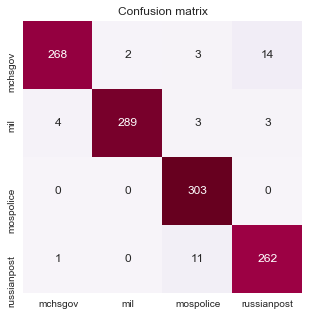

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

m = confusion_matrix(test.source, predictions3)

labels = clf.classes_
plt.figure(figsize = (5,5))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="PuRd")
plt.title("Confusion matrix")
plt.show()

Мультиномиальный байес сработал неплохо. Попробуем другие:

In [66]:
vectorizer = CountVectorizer(ngram_range=(1,2)) 
tfidf = TfidfTransformer()
classifier = LogisticRegression() #пробуем логистическую регрессию

clf = Pipeline([
    ('vect', vectorizer),
    ('tfidf', tfidf),
    ('clf', classifier)
])

%time clf.fit(train.text, train.source)

CPU times: user 11.1 s, sys: 385 ms, total: 11.4 s
Wall time: 8.59 s


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

Precision:   0.97
Recall:   0.97
F1-measure:   0.97
...
Precision:   0.97
Recall:   0.97
F1-measure:   0.97
...
Accuracy:   0.97


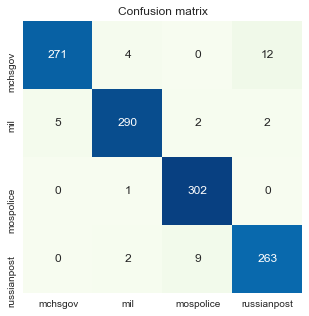

In [67]:
predictions4 = clf.predict(test.text)
evaluate(test.source, predictions4)

m = confusion_matrix(test.source, predictions4)

labels = clf.classes_
plt.figure(figsize = (5,5))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="GnBu")
plt.title("Confusion matrix")
plt.show()

In [70]:
vectorizer = CountVectorizer(ngram_range=(1,2)) 
tfidf = TfidfTransformer()
classifier = RandomForestClassifier() #пробуем случайный лес

clf = Pipeline([
    ('vect', vectorizer),
    ('tfidf', tfidf),
    ('clf', classifier)
])

%time clf.fit(train.text, train.source)

CPU times: user 20.1 s, sys: 423 ms, total: 20.5 s
Wall time: 21 s


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

Precision:   0.96
Recall:   0.96
F1-measure:   0.96
...
Precision:   0.96
Recall:   0.96
F1-measure:   0.96
...
Accuracy:   0.96


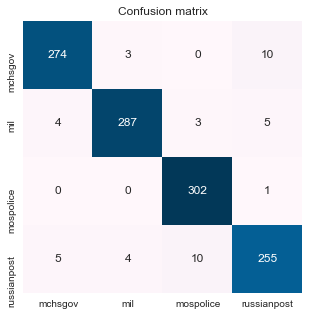

In [72]:
predictions5 = clf.predict(test.text)
evaluate(test.source, predictions5)

m = confusion_matrix(test.source, predictions5)

labels = clf.classes_
plt.figure(figsize = (5,5))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="PuBu")
plt.title("Confusion matrix")
plt.show()

Основное наблюдение - все классификаторы не до конца могут провести различия между Почтой России и МЧС.
### Как мы видим, F-меру 0.97 показала логистическая регрессия - возьмем эту цифру за baseline. 

## Задание 4. Снижение размерности
Добавим в ```sklearn.pipeline```  методы снижения размерности: LSI (TruncatedSVD) и LDA. 

Какие методы классификации разумно использовать после снижения размерности? 

После снижения размерности методом LSA мы можем использовать те классификаторы, которые принимают на вход в качестве X и положительные, и отрицательные значения, например логистическую регрессию или случайный лес. Если мы будем использовать вероятностные методы снижения размерности, то область определения классификатора должна быть от 0 до 1 - можем попробовать наивный Байесовский классификатор.

In [75]:
from sklearn.decomposition import TruncatedSVD

vectorizer = CountVectorizer(ngram_range=(1,2)) 
tfidf = TfidfTransformer()
svd = TruncatedSVD(n_components=100, algorithm='randomized', n_iter=5, random_state=None, tol=0.0)
classifier = LogisticRegression() 

clf = Pipeline([
    ('vect', vectorizer),
    ('tfidf', tfidf),
    ('svd', svd),
    ('clf', classifier)
])

%time clf.fit(train.text, train.source)

CPU times: user 36.5 s, sys: 13.1 s, total: 49.6 s
Wall time: 46.3 s


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

Precision:   0.96
Recall:   0.95
F1-measure:   0.95
...
Precision:   0.96
Recall:   0.96
F1-measure:   0.96
...
Accuracy:   0.96


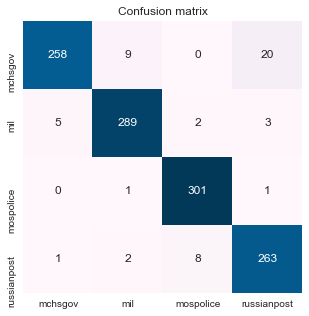

In [76]:
predictions6 = clf.predict(test.text)
evaluate(test.source, predictions6)

m = confusion_matrix(test.source, predictions6)

labels = clf.classes_
plt.figure(figsize = (5,5))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="PuBu")
plt.title("Confusion matrix")
plt.show()

После снижения размерности F-мера не улучшилась. Пробуем вместо логистической регрессии случайный лес.  

CPU times: user 37.3 s, sys: 15.4 s, total: 52.7 s
Wall time: 50.8 s
Precision:   0.97
Recall:   0.96
F1-measure:   0.97
...
Precision:   0.97
Recall:   0.97
F1-measure:   0.97
...
Accuracy:   0.97


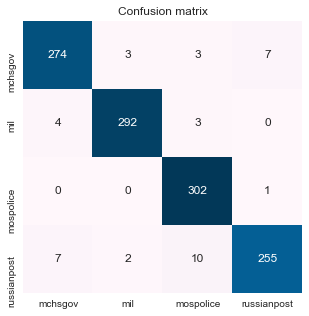

In [77]:
vectorizer = CountVectorizer(ngram_range=(1,2)) 
tfidf = TfidfTransformer()
svd = TruncatedSVD(n_components=100, algorithm='randomized', n_iter=5, random_state=None, tol=0.0)
classifier = RandomForestClassifier() 

clf = Pipeline([
    ('vect', vectorizer),
    ('tfidf', tfidf),
    ('svd', svd),
    ('clf', classifier)
])

%time clf.fit(train.text, train.source)
predictions7 = clf.predict(test.text)
evaluate(test.source, predictions7)

m = confusion_matrix(test.source, predictions7)

labels = clf.classes_
plt.figure(figsize = (5,5))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="PuBu")
plt.title("Confusion matrix")
plt.show()

С LSA и случайным лесом мы остались на baseline 0.97. Теперь попробуем вероятностную LDA + мультиномиальный Байес.

In [79]:
from sklearn.decomposition import LatentDirichletAllocation
import warnings
warnings.filterwarnings('ignore')

In [80]:
vectorizer = CountVectorizer(ngram_range=(1,2)) 
tfidf = TfidfTransformer()
lda = LatentDirichletAllocation(n_components=10, max_iter = 5) #возьмем 10 тем
classifier = MultinomialNB() 

clf = Pipeline([
    ('vect', vectorizer),
    ('tfidf', tfidf),
    ('lda', lda),
    ('clf', classifier)
])

%time clf.fit(train.text, train.source)

CPU times: user 1min 52s, sys: 7.42 s, total: 1min 59s
Wall time: 2min


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip...samples=1000000.0, verbose=0)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

Precision:   0.82
Recall:   0.72
F1-measure:   0.73
...
Precision:   0.72
Recall:   0.72
F1-measure:   0.72
...
Accuracy:   0.72


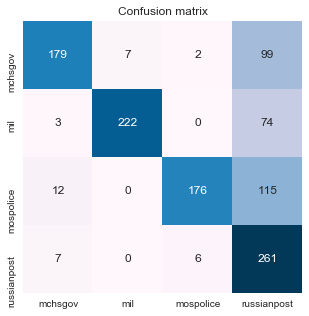

In [81]:
predictions8 = clf.predict(test.text)
evaluate(test.source, predictions8)

m = confusion_matrix(test.source, predictions8)

labels = clf.classes_
plt.figure(figsize = (5,5))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="PuBu")
plt.title("Confusion matrix")
plt.show()

Получилось еще хуже: теперь распознаются неправильно не только классы МЧС и Почты России, но и московской полиции. 

## Задание 5. Лемматизация

Проверим, как изменятся результаты в случае варианта: TruncatedSVD + Random Forest Classifier 

In [86]:
train_set = [' '.join(text) for text in train.lemmas]
test_set = [' '.join(text) for text in test.lemmas]

CPU times: user 28.2 s, sys: 8.23 s, total: 36.4 s
Wall time: 32.7 s
Precision:   0.97
Recall:   0.97
F1-measure:   0.97
...
Precision:   0.97
Recall:   0.97
F1-measure:   0.97
...
Accuracy:   0.97


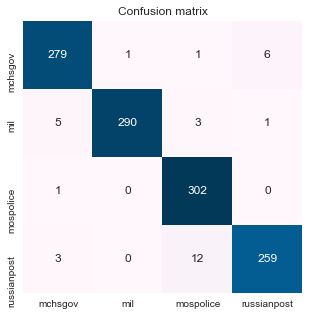

In [92]:
vectorizer = CountVectorizer(ngram_range=(1,2)) #используем на униграммах и биграммах
tfidf = TfidfTransformer()
svd = TruncatedSVD(n_components=100, algorithm='randomized', n_iter=5)
classifier = RandomForestClassifier() 

clf = Pipeline([
    ('vect', vectorizer),
    ('tfidf', tfidf),
    ('svd', svd),
    ('clf', classifier)
])


%time clf.fit(train_set, train.source) #используем на лемматизированных текстах
predictions10 = clf.predict(test_set)
evaluate(test.source, predictions10)

m = confusion_matrix(test.source, predictions10)

labels = clf.classes_
plt.figure(figsize = (5,5))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="PuBu")
plt.title("Confusion matrix")
plt.show()

Baseline остался тот же. 

Попробуем просто на словах: 

CPU times: user 4.82 s, sys: 217 ms, total: 5.04 s
Wall time: 4.16 s
Precision:   0.97
Recall:   0.97
F1-measure:   0.97
...
Precision:   0.97
Recall:   0.97
F1-measure:   0.97
...
Accuracy:   0.97


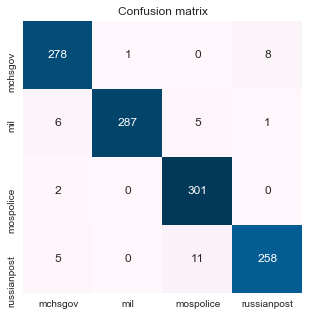

In [90]:
vectorizer = CountVectorizer(ngram_range=(1,1)) #возьмем просто слова
tfidf = TfidfTransformer()
svd = TruncatedSVD(n_components=100, algorithm='randomized', n_iter=5, random_state=None, tol=0.0)
classifier = RandomForestClassifier() 

clf = Pipeline([
    ('vect', vectorizer),
    ('tfidf', tfidf),
    ('svd', svd),
    ('clf', classifier)
])


%time clf.fit(train_set, train.source) #используем на лемматизированных текстах
predictions11 = clf.predict(test_set)
evaluate(test.source, predictions11)

m = confusion_matrix(test.source, predictions11)

labels = clf.classes_
plt.figure(figsize = (5,5))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="PuBu")
plt.title("Confusion matrix")
plt.show()

Ничего не поменялось. 

## Задание 6. Модель скрытых тем
Построим скрытую модель LDA по данной коллекции текстов. 

Здесь не нужно разделять корпус на тестовую и обучающую части, поскольку темы выявляются во всем датасете. 

Модель скрытых тем позволяет увидеть, почему тот или иной класс распознается классификаторами плохо. Темы - это наборы слов, наиболее характерные для того или иного класса (ключевые слова в своем роде). Мы можем видеть, у каких слов больший вес в том или ином классе и предполагать, почему некоторым текстам присваивается иной класс: например, потому что там нет слов, характерных для того или иного класса. Также через модель скрытых тем можно посмотреть, что еще сделать с текстами, чтобы они лучше классифицировались: например, какие еще стоп-слова можно выбросить.  

Сначала предобработаем текст: уберем стоп-слова и т.д.  

In [150]:
%time
import re
from nltk.corpus import stopwords
regex = re.compile("[А-Яа-я]+")

mystopwords = stopwords.words('russian') + ['это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д', 'г']
mystoplemmas = ['который','прошлый','сей', 'свой', 'наш', 'мочь', 'такой', 'год', 'время', 'день', 'весь']

from pymystem3 import Mystem

m = Mystem()

def words_only(text, regex=regex):
    return " ".join(regex.findall(text))

def remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""

def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "
    
def  remove_stoplemmas(text, mystoplemmas = mystoplemmas):
    try:
        return " ".join([token for token in text.split() if not token in mystoplemmas])
    except:
        return ""



df.text = df.text.apply(lemmatize)
df.text = df.text.str.lower()
df.text = df.text.apply(words_only)
df.text = df.text.apply(remove_stopwords)  
df.text = df.text.apply(remove_stoplemmas)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 22.2 µs


Представляем данные в Gensim словарем и корпусом:

In [93]:
from gensim.corpora import *
texts = [df.text.iloc[i].split() for i in range(len(df))]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

Using TensorFlow backend.


In [94]:
print(dictionary)

Dictionary(28119 unique tokens: ['начальник', 'главный', 'оперативный', 'управление', 'генеральный']...)


Тестируем LDA.

In [96]:
%%time
lda = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=4,
                        alpha='auto', eta='auto', iterations = 10, passes = 5)

CPU times: user 51.7 s, sys: 385 ms, total: 52 s
Wall time: 52.5 s


In [98]:
lda.show_topics(4)

[(0,
  '0.029*"полиция" + 0.029*"мвд" + 0.021*"москва" + 0.016*"россия" + 0.015*"сотрудник" + 0.014*"петровка" + 0.011*"гу" + 0.008*"задерживать" + 0.008*"увд" + 0.008*"полицейский"'),
 (1,
  '0.022*"россия" + 0.019*"почтовый" + 0.018*"почта" + 0.009*"отделение" + 0.007*"марка" + 0.006*"российский" + 0.006*"работа" + 0.006*"страна" + 0.005*"новый" + 0.005*"отправление"'),
 (2,
  '0.006*"военный" + 0.006*"минобороны" + 0.005*"боевой" + 0.005*"учение" + 0.004*"корабль" + 0.004*"выполнять" + 0.003*"россия" + 0.003*"комплекс" + 0.003*"открытка" + 0.003*"морской"'),
 (3,
  '0.013*"мчс" + 0.011*"ребенок" + 0.010*"россия" + 0.007*"письмо" + 0.007*"человек" + 0.007*"мчсроссия" + 0.005*"дом" + 0.005*"самый" + 0.004*"помощь" + 0.004*"акция"')]

Ключевые слова всех классов в принципе определились. Визуализируем:

In [99]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis
vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

## Задание 7. Continious bag of words

Представим тексты в виде усреднённых векторов слов, классифицируем тексты при помощи логистической регрессии и проанализируем результаты.

Для получения векторов загрузим векторную модель, без тэгов.

In [9]:
import gensim
from gensim.models import KeyedVectors
import os.path

model = gensim.models.KeyedVectors.load(os.path.join('181', 'model.model'))

Усредним векторы слов, входящих в текст, при помощи функции, и получим в качестве текстов матрицы из усреднённых векторов.

In [12]:
def get_matrix(text, model):
    vector = np.zeros(shape=model.vector_size)
    counter = 0
    for word in text:
        if word in model.vocab: 
            try:
                vector = np.add(vector, model[word])
                counter += 1
            except KeyError:
                pass
    if counter == 0:
        return vector.squeeze()
    return (vector / counter).squeeze() # убираем одномерные векторы при помощи функции .squeeze()

In [17]:
# получить матрицы текстов:

train_vectors = [get_matrix(text, model) for text in train.lemmas]
test_vectors = [get_matrix(text, model) for text in test.lemmas]

In [24]:
# используем логистическую регрессию для проверки метода

clf = LogisticRegression(C=1)
clf.fit(train_vectors, train.source)
preds = clf.predict(test_vectors)
evaluate(test.source, preds)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Precision:   0.92
Recall:   0.92
F1-measure:   0.92
...
Precision:   0.92
Recall:   0.92
F1-measure:   0.92
...
Accuracy:   0.92


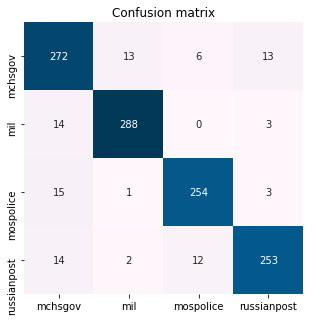

In [27]:
m = confusion_matrix(test.source, preds)

labels = clf.classes_
plt.figure(figsize = (5,5))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="PuBu")
plt.title("Confusion matrix")
plt.show()

Хуже бейзлайна, но всё равно довольно хорошо. Сильнее всего утаются классы про мчс, они немножко похожи на все остальные классы.

### Усреднение с tf-idf.
Сначала получим векторы слов.

In [80]:
# представим слова в виде векторов

def get_vector(text, model):
    vector = np.zeros(shape=model.vector_size)
    counter = 0
    for word in text:
        if word in model.vocab: 
            try:
                vector = np.add(vector, model[word])
                counter += 1
            except KeyError:
                pass
    if counter == 0:
        return vector
    return vector / counter

In [81]:
# получим векторы слов в текстах:

train_vectors = [get_vector(text, model) for text in train.lemmas]
test_vectors = [get_vector(text, model) for text in test.lemmas]

Проверим, как классифицируются полученные векторы.

In [82]:
clf = LogisticRegression(C=1)
clf.fit(train_vectors, train.source)
preds = clf.predict(test_vectors)
evaluate(test.source, preds)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Precision:   0.92
Recall:   0.92
F1-measure:   0.92
...
Precision:   0.92
Recall:   0.92
F1-measure:   0.92
...
Accuracy:   0.92


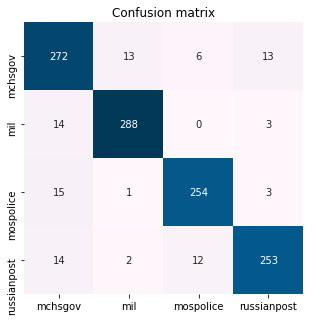

In [83]:
m = confusion_matrix(test.source, preds)

labels = clf.classes_
plt.figure(figsize = (5,5))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="PuBu")
plt.title("Confusion matrix")
plt.show()

Тексты классифицируются, и довольно хорошо: алгоритм достаточно уверенно присвоил текстам классы.

Применим к векторам tf-idf взвешивание, сделаем усредниение и посмотрим на результаты.

In [148]:
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)

train_tfidf = tfidf.fit_transform(train_vectors)
test_tfidf = tfidf.fit_transform(test_vectors)

fit_transform даёт на выходе scr-matrix, нам нужен формат np.array, чтобы скормить его анализатору - получим его.

In [149]:
train_tfidf_array = train_tfidf.toarray()
test_tfidf_array = test_tfidf.toarray()

## tf-idf bug
После применения tf-idf исчезает один из классов -- russianpost. Посмотрим на это и добавим, что если поставить нормалихацию 'l1' вместо 'l2', то исчезнут сразу два класса (покажутся неинформативными).

Теперь получим усреднённые векторы слов с tf-idf-весами для всех текстов. 

In [150]:
def get_mean_matrix(text):
    vector = np.zeros(shape=300)
    counter = 0
    for word in text:
        try:
            vector = np.add(vector, word)
            counter += 1
        except KeyError:
            pass
    if counter == 0:
        return vector.squeeze()
    return (vector / counter).squeeze()

In [151]:
mean_train_vectors = [get_mean_matrix(text) for text in train_tfidf_array]
mean_test_vectors = [get_mean_matrix(text) for text in test_tfidf_array]

In [152]:
clf = LogisticRegression(C=1)
clf.fit(mean_train_vectors, train.source)
preds = clf.predict(mean_test_vectors)
evaluate(test.source, preds)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Precision:   0.22
Recall:   0.33
F1-measure:   0.25
...
Precision:   0.33
Recall:   0.33
F1-measure:   0.33
...
Accuracy:   0.33


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


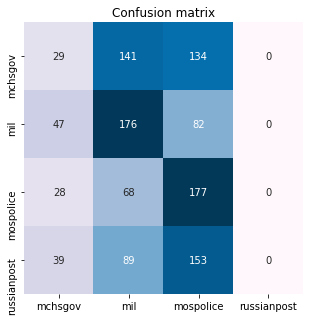

In [153]:
m = confusion_matrix(test.source, preds)

labels = clf.classes_
plt.figure(figsize = (5,5))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="PuBu")
plt.title("Confusion matrix")
plt.show()

Как видно, один из классов исчез или занулился после применения tf-idf. 
К сожалению, наши попытки обойти этот баг не завершились успехом, и лучше ли работают усреднённые с tf-idf-весами вектора, неясно.

## Задание 8
Используем ```fastText``` в режиме классификации. Возьмем обычный нелемматизированный текст. 

In [145]:
import fasttext

In [174]:
with open('data_for_fasttext.txt', 'w', encoding = 'UTF-8') as f:
    for i in train.index:
        text = str(train.text[i])
        label = str(train.source[i])
        f.write(text + ' ' + '__label__' + label + '\n')

In [175]:
classifier = fasttext.supervised('data_for_fasttext.txt', 'model', label_prefix='__label__')
result = classifier.predict([text for text in test.text])

In [114]:
evaluate(result, test.source)

Precision:   0.96
Recall:   0.96
F1-measure:   0.96
...
Precision:   0.96
Recall:   0.96
F1-measure:   0.96
...
Accuracy:   0.96


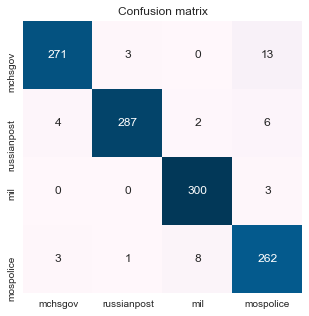

In [117]:
m = confusion_matrix(test.source, result)

labels = ['mchsgov', 'russianpost', 'mil', 'mospolice']
plt.figure(figsize = (5,5))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="PuBu")
plt.title("Confusion matrix")
plt.show()

FastText показал не самую лучшую F-меру. 

# Заключение

Сложно сказать, какой метод нам показался лучше - многие классификаторы были на уровне baseline. Во время экспериментов в зависимости от выборки baseline был 0.96, и лучше всех о себе тогда заявил метод TruncatedSVD + Random Forest Classifier + лемматизация (F1 = 0.98), но, к сожалению, тестовая выборка поменялась, и те результаты не сохранились. Думаю, для этого датасета мы бы выбрали это сочетание методов. 

Задание выполнено Николаевой Анной и Катричевой Надеждой. 